In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from random import seed
from random import choice

In [57]:
mul = pd.read_csv('test.chr1.mul.wig', sep='\t')
mul_arr = mul["fixedStep chrom=chr1 start=1 step=1"]

In [58]:
mur = pd.read_csv('test.chr1.mur.wig', sep='\t')
mur_arr = mur["fixedStep chrom=chr1 start=56 step=1"]

In [4]:
def singleMap(read_length:int):
    single_logic = []
    for i in range(len(mul_arr)):
        if mul_arr[i] <= read_length or \
        i + read_length - 1 >= 56 and \
        i + read_length - 1 <= len(mur_arr) - 1 and \
        mur_arr[i + read_length - 1] <= read_length:
            single_logic.append(True) # Read maps uniquely
        else:
            single_logic.append(False) # Read does not map uniquely
    return (len(single_logic) - sum(single_logic)) / len(single_logic)

single_arr = []
for x in range(1,301):
    single_arr.append(singleMap(x))
#print(single_arr)

In [96]:
def pairMap(read_length:int, fragment_length:int, fragment_std:int):
    np.random.seed(0)
    pair_logic = []
    distr = np.random.normal(fragment_length, fragment_std, len(mul_arr))
    for i in range(len(mul_arr)):
        if mul_arr[i] <= read_length or \
        i + int(distr[i]) - 1 <= len(mur_arr) - 1 and \
        mur_arr[i + int(distr[i]) - 1] <= read_length:
            pair_logic.append(True) # Read maps uniquely
        else:
            pair_logic.append(False) # Read does not map uniquely
    return (len(pair_logic) - sum(pair_logic)) / len(pair_logic)

pair_arr = []
for x in range(1,301):
    pair_arr.append(pairMap(x, 700, 50))

In [97]:
#Mate Pair
mate_pair_arr = []
for x in range(1,301):
    mate_pair_arr.append(pairMap(x, 2000, 50))

In [100]:
print(singleMap(50))
print(pairMap(50, 700, 50))
print(singleMap(75))
print(pairMap(75, 700, 50))
print(singleMap(150))
print(pairMap(150, 700, 50))

0.8118811881188119
0.7965796579657966
0.7044704470447045
0.6423642364236424
0.5095509550955095
0.34393439343934396


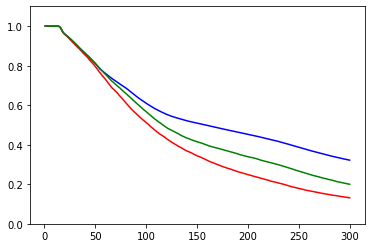

In [99]:
x = list(range(1,301))
plt.ylim([0, 1.1])
plt.plot(x, single_arr, color="blue")
plt.plot(x, pair_arr, color="red")
plt.plot(x, mate_pair_arr, color="green")

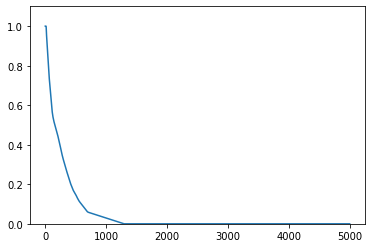

In [79]:
x = list(range(1,5001))
plt.ylim([0, 1.1])
plt.plot(x, long_single_arr)

In [ ]:
a = [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]
output = []
i = 0
space = 0
for ii in a:
    if a[i] == 1:
        output.append(space)
        space = 0
    elif a[i] == 0:
        space += 1
    i += 1
print(output)

Test function on simple boolean array

In [13]:
a = [False, True, False, False, False, True, False, True, True, False, False, True, True, True, True, True, False]
# a = [False, False]
# a = [True, True]
#      0      1      2      3      4     5     6     7     8      9      10    11    12    13    14    15     16
true_res = [[0, 0], [2, 4], [6, 6], [9, 10], [16, 16]]
out = []
pair = []
for i in range(len(a)):
    if i == 0:
        prev = True
    else:
        prev = a[i-1]   
    if a[i]==False and prev==True:
        pair.append(i)
    if a[i]==True and prev==False:
        pair.append(i-1)
        out.append(pair)
        pair=[]
    if i == len(a)-1 and a[i]==False:
        pair.append(i)
        out.append(pair)
        pair=[]
    
chr_name = "chr1"
print(true_res)
print(out)
for i in out:
#     print(i)
    print(chr_name + '\t' + str(i[0]) + '\t' + str(i[1] + 1))

[[0, 0], [2, 4], [6, 6], [9, 10], [16, 16]]
[[0, 0], [2, 4], [6, 6], [9, 10], [16, 16]]
chr1	0	1
chr1	2	5
chr1	6	7
chr1	9	11
chr1	16	17


Test on test.aligned (manually aligned chr1 subset)

In [7]:
mul = pd.read_csv('/Users/pavel/Desktop/PROJECTS/hooman/test.aligned.mul.wig', sep='\t')
mul_arr = mul[str(mul.columns[0])]

mur = pd.read_csv('/Users/pavel/Desktop/PROJECTS/hooman/test.aligned.mur.wig', sep='\t')
mur_arr = mur[str(mur.columns[0])]

chr_name = list(mul.columns.values)[0].split(' ')[1].split('=')[1]
spacing = int(list(mul.columns.values)[0].split(' ')[2].split('=')[1])

def singleMap(read_length:int, mul_arr, mur_arr):
    single_logic = []
    for i in range(len(mul_arr)):
        if i + read_length - 1 > len(mur_arr) - 1:
            break
        if mul_arr[i] <= read_length or \
        mur_arr[i + read_length - 1] <= read_length:
            single_logic.append(True) # Read maps uniquely
        else:
            single_logic.append(False) # Read does not map uniquely
    return single_logic

def array_to_bed(arr):
    out = []
    pair = []
    for i in range(len(arr)):
        if i == 0:
            prev = True
        else:
            prev = arr[i-1]   
        if arr[i]==False and prev==True:
            pair.append(i)
        if arr[i]==True and prev==False:
            pair.append(i-1)
            out.append(pair)
            pair=[]
        if i == len(arr)-1 and arr[i]==False:
            pair.append(i)
            out.append(pair)
            pair=[]
    return out

start = 56
x = 150
single_res = singleMap(x, mul_arr, mur_arr)
single_arr = array_to_bed(single_res)
# print(single_res)
# print(len(single_res))
# print(single_arr)

for i in single_arr:
    print(chr_name + '\t' + str(i[0] + spacing - 1) + '\t' + str(i[1] + spacing))

chr1	58	137
chr1	175	740
chr1	884	932
chr1	1070	1429
chr1	2717	3082
chr1	3225	3231
chr1	3381	3424
chr1	3574	3584
chr1	3801	3850
chr1	4008	5203
chr1	5414	5445
chr1	5595	5837
chr1	5987	6389
chr1	6539	7100
chr1	7370	7387
chr1	7469	8355
chr1	8583	9263
chr1	9574	9585
chr1	9705	9906


In [8]:
mul_arr

0       123
1       122
2       121
3       229
4       228
       ... 
9995    103
9996    102
9997    101
9998    100
9999     99
Name: fixedStep chrom=chr1 start=56 step=1, Length: 10000, dtype: int64

In [9]:
mur_arr

0        50
1        51
2        52
3        53
4        45
       ... 
9995    347
9996    348
9997    349
9998    350
9999    351
Name: fixedStep chrom=chr1 start=56 step=1, Length: 10000, dtype: int64

Test on real chr1 subset

In [21]:
mul = pd.read_csv('/Users/pavel/Desktop/PROJECTS/hooman/test.chr1.mul.wig', sep='\t')
mur = pd.read_csv('/Users/pavel/Desktop/PROJECTS/hooman/test.chr1.mur.wig', sep='\t')

# chr_name = list(mul.columns.values)[0].split(' ')[1].split('=')[1]
# spacing = int(list(mul.columns.values)[0].split(' ')[2].split('=')[1])

# mul = mul.iloc[56:].reset_index()
# mul_arr = mul[str(mul.columns[0])]

# mur = mur.iloc[:-56]
# mur_arr = mur[str(mur.columns[0])]

#chr_name = list(mul.columns.values)[0].split(' ')[1].split('=')[1]
chr_name = "chr1"
#spacing = int(list(mul.columns.values)[0].split(' ')[2].split('=')[1])
# spacing = 0
spacing = 56

mul_arr = mul[str(mul.columns[0])].tolist()[spacing-1:]
mur_arr = mur[str(mur.columns[0])].tolist()[:-spacing-1]

def singleMap_bed(read_length:int, mul_arr, mur_arr):
    out = []
    pair = []
    prev = True
    for i in range(len(mul_arr)):
        if i + read_length - 1 > len(mur_arr) - 1:
            if not prev:
                pair.append(i)
                out.append(pair)
                pair=[]
                break
        if mul_arr[i] <= read_length or \
        mur_arr[i + read_length - 1] <= read_length:
            flag = True # Read maps uniquely
            if not prev:
                pair.append(i-1)
                out.append(pair)
                pair=[]
            #single_logic.append(True) # Read maps uniquely
        else:
            flag = False # Read does not map uniquely
            if prev:
                pair.append(i)
            #single_logic.append(False) # Read does not map uniquely
        prev = flag
    return out

def singleMap(read_length:int, mul_arr, mur_arr):
    single_logic = []
    for i in range(len(mul_arr)):
        if i + read_length - 1 > len(mur_arr) - 1:
            break
        if mul_arr[i] <= read_length or \
        mur_arr[i + read_length - 1] <= read_length:
            single_logic.append(True) # Read maps uniquely
        else:
            single_logic.append(False) # Read does not map uniquely
    return single_logic

def array_to_bed(arr):
    out = []
    pair = []
    for i in range(len(arr)):
        if i == 0:
            prev = True
        else:
            prev = arr[i-1]   
        if arr[i]==False and prev==True:
            pair.append(i)
        if arr[i]==True and prev==False:
            pair.append(i-1)
            out.append(pair)
            pair=[]
        if i == len(arr)-1 and arr[i]==False:
            pair.append(i)
            out.append(pair)
            pair=[]
    return out

#start = 56
x = 150
# single_res = singleMap(x, mul_arr, mur_arr)
# single_arr = array_to_bed(single_res)
single_res = singleMap_bed(x, mul_arr, mur_arr)
# print(single_res)
# print(len(single_res))
# print(single_arr)

for i in single_res:
    print(chr_name + '\t' + str(i[0] + spacing - 1) + '\t' + str(i[1] + spacing))

chr1	58	137
chr1	175	740
chr1	884	932
chr1	1070	1429
chr1	2717	3082
chr1	3225	3231
chr1	3381	3424
chr1	3574	3584
chr1	3801	3850
chr1	4008	5203
chr1	5414	5445
chr1	5595	5837
chr1	5987	6389
chr1	6539	7100
chr1	7370	7387
chr1	7469	8355
chr1	8583	9263
chr1	9574	9585
chr1	9705	9849


In [15]:
mul_arr

[20,
 55,
 54,
 53,
 52,
 51,
 50,
 53,
 52,
 51,
 50,
 49,
 48,
 47,
 46,
 45,
 117,
 116,
 115,
 114,
 113,
 112,
 111,
 110,
 109,
 108,
 107,
 106,
 105,
 104,
 103,
 102,
 101,
 100,
 99,
 98,
 97,
 96,
 95,
 94,
 93,
 92,
 91,
 90,
 89,
 88,
 87,
 86,
 85,
 84,
 83,
 82,
 81,
 125,
 124,
 123,
 122,
 121,
 229,
 228,
 227,
 226,
 225,
 224,
 223,
 222,
 221,
 220,
 219,
 218,
 217,
 216,
 215,
 214,
 213,
 212,
 211,
 210,
 209,
 208,
 207,
 206,
 205,
 204,
 203,
 202,
 201,
 200,
 199,
 198,
 197,
 196,
 195,
 194,
 193,
 192,
 191,
 190,
 189,
 188,
 187,
 186,
 185,
 184,
 183,
 182,
 181,
 180,
 179,
 178,
 177,
 176,
 175,
 174,
 173,
 172,
 171,
 170,
 169,
 168,
 167,
 166,
 165,
 164,
 163,
 162,
 161,
 160,
 159,
 158,
 157,
 156,
 155,
 154,
 153,
 152,
 151,
 150,
 149,
 148,
 147,
 146,
 145,
 144,
 143,
 142,
 141,
 140,
 139,
 138,
 137,
 136,
 135,
 134,
 133,
 132,
 131,
 130,
 129,
 128,
 127,
 126,
 125,
 124,
 123,
 122,
 121,
 120,
 119,
 118,
 117,
 116,
 11

In [16]:
mur_arr

[50,
 51,
 52,
 53,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178

In [ ]:
chr1	176	741
chr1	885	933
chr1	1071	1430
chr1	2718	3083
chr1	3226	3232
chr1	3382	3425
chr1	3575	3585
chr1	3802	3851
chr1	4009	5204
chr1	5415	5446
chr1	5596	5838
chr1	5988	6390
chr1	6540	7101
chr1	7371	7388
chr1	7470	8356
chr1	8584	9264
chr1	9575	9586
chr1	9706	9850

In [4]:
mul = pd.read_csv('/Users/pavel/Desktop/PROJECTS/hooman/test.chr1.mul.wig', sep='\t')
mul_short = mul.iloc[56:].reset_index()
mul_arr = mul_short[str(mul_short.columns[0])]
# mul
# mul_short
mul_arr

0         56
1         57
2         58
3         59
4         60
        ... 
9938    9994
9939    9995
9940    9996
9941    9997
9942    9998
Name: index, Length: 9943, dtype: int64

In [3]:
mur = pd.read_csv('/Users/pavel/Desktop/PROJECTS/hooman/test.chr1.mur.wig', sep='\t')
mur_short = mur.iloc[:-56]
mur_arr = mur_short[str(mur_short.columns[0])]
mur_arr

0        50
1        51
2        52
3        53
4        45
       ... 
9938    290
9939    291
9940    292
9941    293
9942    294
Name: fixedStep chrom=chr1 start=56 step=1, Length: 9943, dtype: int64

True values for pair map

In [22]:
mul = pd.read_csv('/Users/pavel/Desktop/PROJECTS/hooman/test.aligned.mul.wig', sep='\t')
mul_arr = mul[str(mul.columns[0])]

mur = pd.read_csv('/Users/pavel/Desktop/PROJECTS/hooman/test.aligned.mur.wig', sep='\t')
mur_arr = mur[str(mur.columns[0])]

chr_name = list(mul.columns.values)[0].split(' ')[1].split('=')[1]
spacing = int(list(mul.columns.values)[0].split(' ')[2].split('=')[1])

def pairMap(read_length:int, fragment_length:int, fragment_std:int, mul_arr, mur_arr):
    np.random.seed(0)
    pair_logic = []
    distr = np.random.normal(fragment_length, fragment_std, len(mul_arr))
    for i in range(len(mul_arr)):
        if i + int(distr[i]) - 1 > len(mur_arr) - 1:
            break
        if mul_arr[i] <= read_length or \
        mur_arr[i + int(distr[i]) - 1] <= read_length:
            pair_logic.append(True) # Read maps uniquely
        else:
            pair_logic.append(False) # Read does not map uniquely
    return pair_logic

def array_to_bed(arr):
    out = []
    pair = []
    for i in range(len(arr)):
        if i == 0:
            prev = True
        else:
            prev = arr[i-1]   
        if arr[i]==False and prev==True:
            pair.append(i)
        if arr[i]==True and prev==False:
            pair.append(i-1)
            out.append(pair)
            pair=[]
        if i == len(arr)-1 and arr[i]==False:
            pair.append(i)
            out.append(pair)
            pair=[]
    return out

start = 56
min_read_length = 150

pair_res = pairMap(min_read_length, 700, 50, mul_arr, mur_arr)
pair_arr = array_to_bed(pair_res)

# print(single_res)
# print(len(single_res))
# print(single_arr)

for i in pair_arr:
    print(chr_name + '\t' + str(i[0] + spacing - 1) + '\t' + str(i[1] + spacing))

chr1	58	79
chr1	80	98
chr1	99	137
chr1	176	177
chr1	179	182
chr1	185	186
chr1	187	190
chr1	192	193
chr1	194	196
chr1	201	202
chr1	203	205
chr1	207	209
chr1	210	211
chr1	212	214
chr1	219	220
chr1	221	223
chr1	229	230
chr1	236	237
chr1	238	239
chr1	240	242
chr1	245	246
chr1	248	249
chr1	253	254
chr1	260	261
chr1	291	293
chr1	301	303
chr1	309	311
chr1	314	315
chr1	321	322
chr1	325	327
chr1	328	329
chr1	331	332
chr1	339	341
chr1	343	344
chr1	349	350
chr1	351	353
chr1	354	355
chr1	357	358
chr1	360	361
chr1	364	366
chr1	369	377
chr1	380	382
chr1	383	384
chr1	393	394
chr1	396	400
chr1	405	407
chr1	408	410
chr1	424	425
chr1	426	427
chr1	432	433
chr1	435	436
chr1	440	441
chr1	442	444
chr1	448	449
chr1	453	454
chr1	459	460
chr1	469	470
chr1	473	476
chr1	477	478
chr1	481	483
chr1	487	488
chr1	491	492
chr1	493	494
chr1	499	500
chr1	501	502
chr1	506	511
chr1	513	514
chr1	518	519
chr1	520	521
chr1	524	525
chr1	529	532
chr1	533	537
chr1	539	540
chr1	541	545
chr1	546	551
chr1	552	553
chr1	554	561
chr1

Test pair map with fix insert size

In [23]:
mul = pd.read_csv('/Users/pavel/Desktop/PROJECTS/hooman/test.aligned.mul.wig', sep='\t')
mul_arr = mul[str(mul.columns[0])]

mur = pd.read_csv('/Users/pavel/Desktop/PROJECTS/hooman/test.aligned.mur.wig', sep='\t')
mur_arr = mur[str(mur.columns[0])]

chr_name = list(mul.columns.values)[0].split(' ')[1].split('=')[1]
spacing = int(list(mul.columns.values)[0].split(' ')[2].split('=')[1])

def pairMap(read_length:int, fragment_length:int, fragment_std:int, mul_arr, mur_arr):
    np.random.seed(0)
    pair_logic = []
    distr = 700
    for i in range(len(mul_arr)):
        if i + int(distr) - 1 > len(mur_arr) - 1:
            break
        if mul_arr[i] <= read_length or \
        mur_arr[i + int(distr) - 1] <= read_length:
            pair_logic.append(True) # Read maps uniquely
        else:
            pair_logic.append(False) # Read does not map uniquely
    return pair_logic

def array_to_bed(arr):
    out = []
    pair = []
    for i in range(len(arr)):
        if i == 0:
            prev = True
        else:
            prev = arr[i-1]   
        if arr[i]==False and prev==True:
            pair.append(i)
        if arr[i]==True and prev==False:
            pair.append(i-1)
            out.append(pair)
            pair=[]
        if i == len(arr)-1 and arr[i]==False:
            pair.append(i)
            out.append(pair)
            pair=[]
    return out

start = 56
min_read_length = 150

pair_res = pairMap(min_read_length, 700, 50, mul_arr, mur_arr)
pair_arr = array_to_bed(pair_res)

# print(single_res)
# print(len(single_res))
# print(single_arr)

for i in pair_arr:
    print(chr_name + '\t' + str(i[0] + spacing - 1) + '\t' + str(i[1] + spacing))

chr1	58	137
chr1	175	190
chr1	334	382
chr1	520	740
chr1	2831	2874
chr1	3024	3034
chr1	3574	3584
chr1	3801	3850
chr1	4008	4653
chr1	4864	4895
chr1	5045	5203
chr1	5437	5445
chr1	5595	5837
chr1	5989	6389
chr1	6539	6550
chr1	6820	6837
chr1	6919	7100
chr1	7370	7387
chr1	7469	7805
chr1	8033	8355
chr1	8583	8713
chr1	9024	9035
chr1	9155	9263


Combined function

In [24]:
mul = pd.read_csv('/Users/pavel/Desktop/PROJECTS/hooman/test.chr1.mul.wig', sep='\t')
mur = pd.read_csv('/Users/pavel/Desktop/PROJECTS/hooman/test.chr1.mur.wig', sep='\t')

chr_name = "chr1"
spacing = 56

mul_arr = mul[str(mul.columns[0])].tolist()[spacing-1:]
mur_arr = mur[str(mur.columns[0])].tolist()[:-spacing-1]

def pairMap_bed(read_length:int, fragment_length:int, fragment_std:int, mul_arr, mur_arr):
    np.random.seed(0)
    out = []
    pair = []
    prev = True
    distr = np.random.normal(fragment_length, fragment_std, len(mul_arr))
    for i in range(len(mul_arr)):
        if i + int(distr[i]) - 1 > len(mur_arr) - 1:
            break
        if mul_arr[i] <= read_length or \
        mur_arr[i + int(distr[i]) - 1] <= read_length:
            flag = True # Read maps uniquely
            if not prev:
                pair.append(i-1)
                out.append(pair)
                pair=[]
        else:
            flag = False # Read does not map uniquely
            if prev:
                pair.append(i)
            #single_logic.append(False) # Read does not map uniquely
        prev = flag
    return out
    
def pairMap(read_length:int, fragment_length:int, fragment_std:int, mul_arr, mur_arr):
    np.random.seed(0)
    pair_logic = []
    distr = np.random.normal(fragment_length, fragment_std, len(mul_arr))
    for i in range(len(mul_arr)):
        if i + int(distr[i]) - 1 > len(mur_arr) - 1:
            break
        if mul_arr[i] <= read_length or \
        mur_arr[i + int(distr[i]) - 1] <= read_length:
            pair_logic.append(True) # Read maps uniquely
        else:
            pair_logic.append(False) # Read does not map uniquely
    return pair_logic

def array_to_bed(arr):
    out = []
    pair = []
    for i in range(len(arr)):
        if i == 0:
            prev = True
        else:
            prev = arr[i-1]   
        if arr[i]==False and prev==True:
            pair.append(i)
        if arr[i]==True and prev==False:
            pair.append(i-1)
            out.append(pair)
            pair=[]
        if i == len(arr)-1 and arr[i]==False:
            pair.append(i)
            out.append(pair)
            pair=[]
    return out

x = 150
pair_res = pairMap_bed(min_read_length, 700, 50, mul_arr, mur_arr)

for i in pair_res:
    print(chr_name + '\t' + str(i[0] + spacing - 1) + '\t' + str(i[1] + spacing))

chr1	58	79
chr1	80	98
chr1	99	137
chr1	176	177
chr1	179	182
chr1	185	186
chr1	187	190
chr1	192	193
chr1	194	196
chr1	201	202
chr1	203	205
chr1	207	209
chr1	210	211
chr1	212	214
chr1	219	220
chr1	221	223
chr1	229	230
chr1	236	237
chr1	238	239
chr1	240	242
chr1	245	246
chr1	248	249
chr1	253	254
chr1	260	261
chr1	291	293
chr1	301	303
chr1	309	311
chr1	314	315
chr1	321	322
chr1	325	327
chr1	328	329
chr1	331	332
chr1	339	341
chr1	343	344
chr1	349	350
chr1	351	353
chr1	354	355
chr1	357	358
chr1	360	361
chr1	364	366
chr1	369	377
chr1	380	382
chr1	383	384
chr1	393	394
chr1	396	400
chr1	405	407
chr1	408	410
chr1	424	425
chr1	426	427
chr1	432	433
chr1	435	436
chr1	440	441
chr1	442	444
chr1	448	449
chr1	453	454
chr1	459	460
chr1	469	470
chr1	473	476
chr1	477	478
chr1	481	483
chr1	487	488
chr1	491	492
chr1	493	494
chr1	499	500
chr1	501	502
chr1	506	511
chr1	513	514
chr1	518	519
chr1	520	521
chr1	524	525
chr1	529	532
chr1	533	537
chr1	539	540
chr1	541	545
chr1	546	551
chr1	552	553
chr1	554	561
chr1

In [48]:
enumerate(a)